In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
#Load in files
with open("optimization_inhib_full_pop.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_inhib_full_pop.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_inhib_full_pop.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [5]:
#Print returned optimization output
optimization

,population,mut_rate,cov_rate,Fitness,Convergence
0,27.0,0.343543,0.844261,-69.893223,0.0
1,21.0,0.361280,1.000000,-69.896032,3.0
2,33.0,0.553692,0.647196,-69.941547,4.5
3,21.0,0.259537,1.000000,-69.950715,10.5
4,26.0,1.000000,0.554235,-69.989871,11.0


In [6]:
#Create DF for objective data, adding a boolean column for successes
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF['success'] = objectiveDF['Fitness'] < -69.98987
objectiveDF

,population,mut_rate,cov_rate,Fitness,Convergence,success
0,27.0,0.343543,0.844261,-69.893223,0,False
1,18.0,0.504860,0.443842,-69.941547,11,False
2,45.0,0.876329,0.051167,-69.989871,12,True
3,12.0,0.853611,0.222919,-69.989871,20,True
4,15.0,0.457937,0.627310,-69.893223,0,False
...,...,...,...,...,...,...
295,13.0,0.473829,0.396943,-69.941547,9,False
296,12.0,0.221122,0.836025,-69.893223,0,False
297,29.0,0.520587,0.586558,-69.941547,6,False
298,30.0,0.772338,0.590187,-69.989871,19,True


In [7]:
# Create dataframes based on success
successes = objectiveDF[objectiveDF['Fitness'] < -69.98987]
failures = objectiveDF[objectiveDF['Fitness'] > -69.98987]

In [8]:
# Calculate averages for successful simulations
print("Average mutation rate for success:",successes['mut_rate'].mean())
print("Average crossover rate for success:",successes['cov_rate'].mean())
print("Average convergence rate for success:",successes['Convergence'].mean())

Average mutation rate for success: 0.7585936542737058
Average crossover rate for success: 0.5054779122546351
Average convergence rate for success: 18.05


In [9]:
# Look at averages by convergence
successes.groupby('Convergence').mean()

,population,mut_rate,cov_rate,Fitness,success
Convergence,,,,,
11,28.000000,0.969476,0.529061,-69.989871,1.0
12,31.800000,0.843242,0.254534,-69.989871,1.0
13,37.666667,0.884658,0.546442,-69.989871,1.0
14,24.000000,0.862632,0.314443,-69.989871,1.0
15,20.000000,0.886931,0.290300,-69.989871,1.0
16,38.250000,0.840921,0.552344,-69.989871,1.0
17,31.666667,0.785139,0.512187,-69.989871,1.0
18,22.500000,0.788838,0.855991,-69.989871,1.0
19,37.000000,0.648084,0.507608,-69.989871,1.0


[Text(0.5, 1.0, 'Convergence vs. Fitness for All Simulations')]

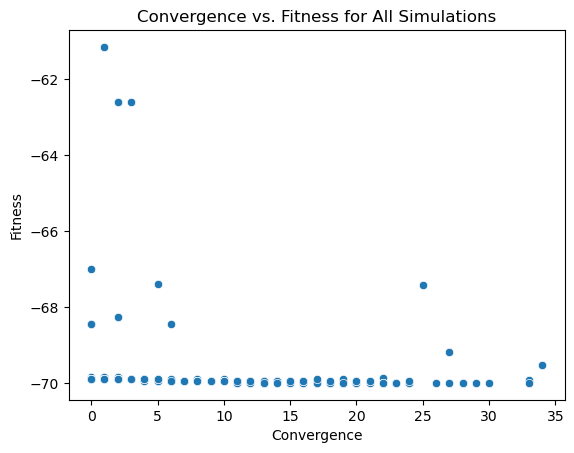

In [10]:
# Build a scatter plot of convergence vs. fitness
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Convergence vs. Fitness for All Simulations')

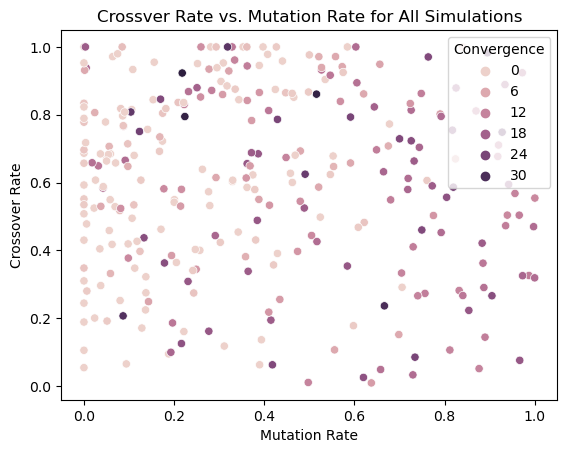

In [12]:
# Loot at convergence by mutation and crossover rate
sns.set_palette("pastel")
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF,
                hue = 'Convergence').set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig('Convergence_inhib_full_pop')

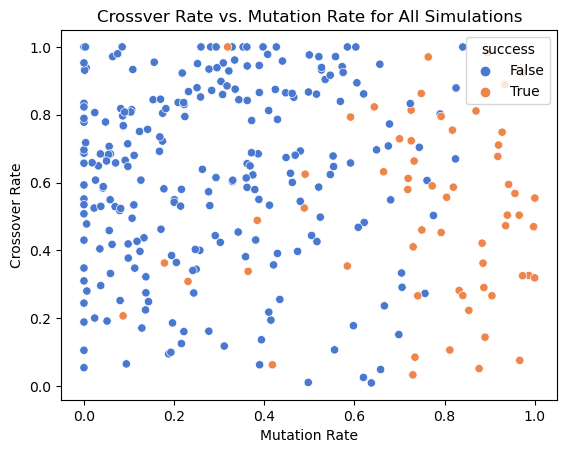

In [13]:
# Loot at success by mutation and crossover rate
colors = ["Orange","Blue"]
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF, 
                hue = 'success', palette = "muted").set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.savefig('Success_inhib_full_pop')

## Build plots to explore successful simulations

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Successful Simulations')]

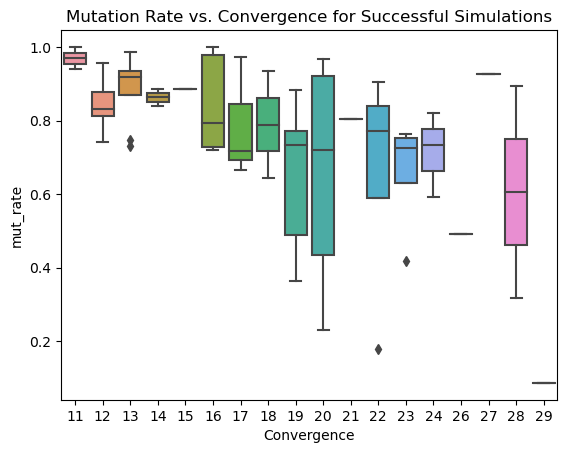

In [14]:
# Look at the distribution of mutation rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='mut_rate', data= successes).set(title='Mutation Rate vs. Convergence for Successful Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Successful Simulations')]

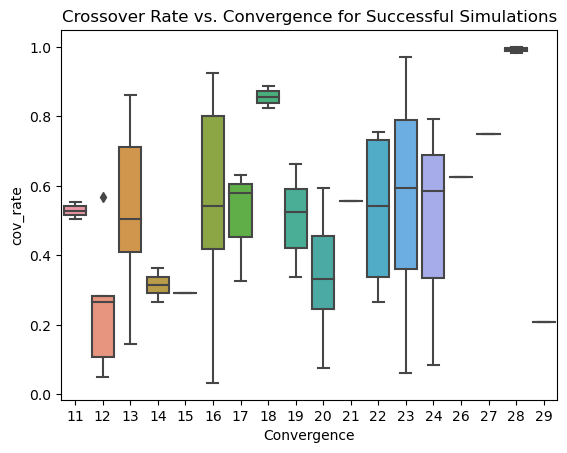

In [15]:
# Look at the distribution of crossover rate by convergence for successful simulations
sns.boxplot(x='Convergence', y='cov_rate', data= successes).set(title='Crossover Rate vs. Convergence for Successful Simulations')

In [16]:
# Group the data by convergence
groups_size = pd.DataFrame(successes.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Successful Simulations by Convergence')]

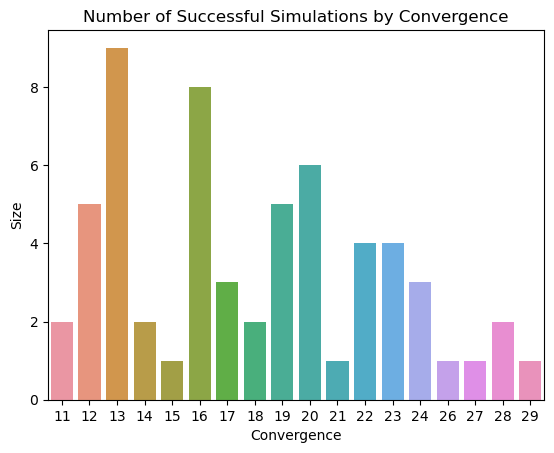

In [17]:
# Count the number of successful simulations by convergence
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Successful Simulations by Convergence')

## Build the same plots for failed simulations

[Text(0.5, 1.0, 'Convergence vs. Fitness for Failed Simulations')]

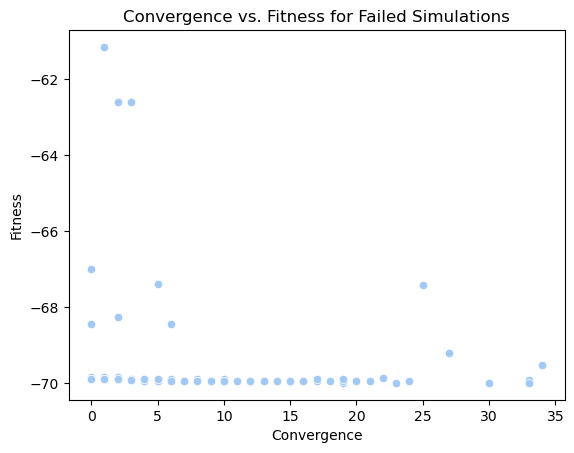

In [18]:
sns.scatterplot(x='Convergence', y='Fitness', data= failures).set(title='Convergence vs. Fitness for Failed Simulations')

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for Failed Simulations')]

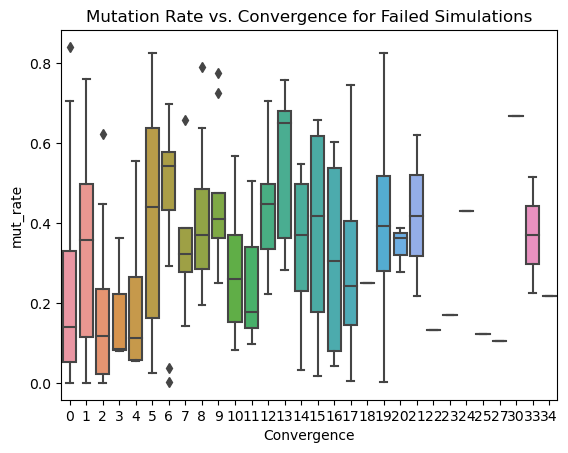

In [19]:
sns.boxplot(x='Convergence', y='mut_rate', data= failures).set(title='Mutation Rate vs. Convergence for Failed Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for Failed Simulations')]

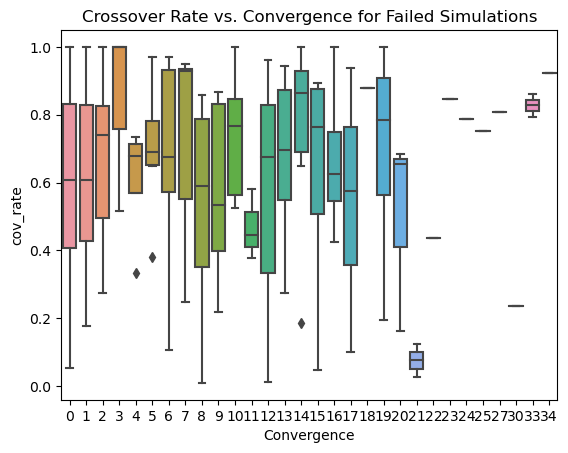

In [20]:
sns.boxplot(x='Convergence', y='cov_rate', data= failures).set(title='Crossover Rate vs. Convergence for Failed Simulations')

In [21]:
groups_size = pd.DataFrame(failures.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Failed Simulations by Convergence')]

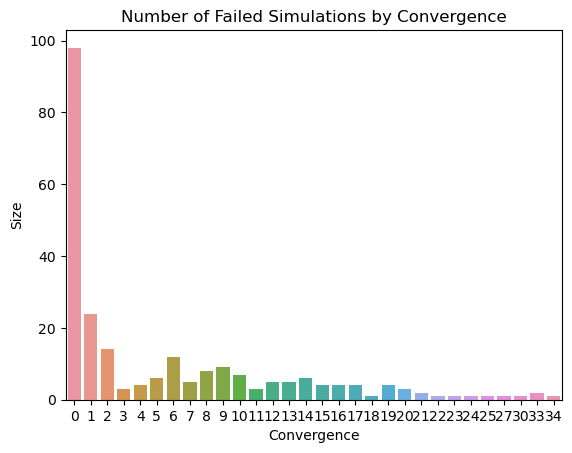

In [22]:
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Failed Simulations by Convergence')